Importieren der relevanten Packages
======================================

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2

Importieren der öffentlich zugänglichen Daten von Awad et al. (2019)
====================================================================

In [4]:
trolley_data = pd.read_csv('Shared_data_responses_demographics.csv')
trolley_data

,UserIP_Anonymized,Scenario,survey.age,survey.gender,survey.education,survey.political,survey.religious,country_code,Outcome,Continent
0,0002ae2d,Footbridge,19,Women,College,0.56,0.00,GB,0,Europe
1,0002ae2d,Loop,19,Women,College,0.56,0.00,GB,1,Europe
2,0002ae2d,Switch,19,Women,College,0.56,0.00,GB,1,Europe
3,00065336,Footbridge,19,Men,College,0.00,0.68,FR,1,Europe
4,00065336,Loop,19,Men,College,0.00,0.68,FR,0,Europe
...,...,...,...,...,...,...,...,...,...,...
59154,ffef6123,Footbridge,27,Men,College,0.34,0.53,SG,0,Asia
59155,ffef6123,Loop,23,Men,College,1.00,0.00,SG,1,Asia
59156,ffef6123,Loop,27,Men,College,0.34,0.53,SG,1,Asia
59157,ffef6123,Switch,23,Men,College,1.00,0.00,SG,1,Asia


Filtern der Daten nach Teilnehmern aus Deutschland, die Antworten bezüglich des klassischen Trolley Szenarios ("Switch") gegeben haben
==================================================

In [14]:
data_DE = trolley_data.loc[(trolley_data['Scenario'] == 'Switch') & (trolley_data['country_code'] == 'DE')]

Erstellung einer Matrix zur Darstellung der für die Beantwortung der Forschungsfrage relevanten Daten
=================================================================================================

In [15]:
dataset_table = pd.crosstab(data_DE['survey.gender'], data_DE['Outcome'])
print(dataset_table)

Outcome          0     1
survey.gender           
Men            226  1232
Women           53   359


Anwenden des Chi² Tests zur Prüfung von H<sub>0</sub>
========================================================

H<sub>0</sub>: Die Variablen "Geschlecht" und "gegebene Antwort" sind unabhängig <br>
-----------------------------------------------------------------------
H<sub>1</sub>: Die Variablen "Geschlecht" und "gegebene Antwort" sind nicht unabhängig
-----------------------------------------------------------------------

$\chi^2$-Formel:
===============
$\chi^2=\sum\frac{(o-e)^2}{e}$
------------------------------

In [27]:
#Beobachtete Häufigkeiten (o):
Observed_Values = dataset_table.values
print("Beobachtete Häufigkeiten:\n", Observed_Values)

Beobachtete Häufigkeiten:
 [[ 226 1232]
 [  53  359]]


In [30]:
#Erwartete Häufigkeiten (e):
val=stats.chi2_contingency(dataset_table)
Expected_Values=val[3]
print("Erwartete Häufigkeiten:\n", Expected_Values)

Erwartete Häufigkeiten:
 [[ 217.53048128 1240.46951872]
 [  61.46951872  350.53048128]]


In [35]:
#Ermitteln des Chi²-Werts:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("Chi-Quadrat Wert:", chi_square_statistic)

chi-Quadrat Wert: 1.7591916738204885


Prüfen von H<sub>0</sub> durch Intepretation des berechneten $\chi^2$-Werts:
--------------------------

In [34]:
# Ermitteln des Freiheitsgrades:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
dof=(no_of_rows-1)*(no_of_columns-1)
print("Freiheitsgrad:", dof)
#Festlegen des Signifikanzniveaus ("alpha" auf 0.05):
alpha = 0.05
print("Signifikanzniveau:", alpha)

Freiheitsgrad: 1
Signifikanzniveau: 0.05


In [37]:
#Bestimmen des kritischen Chi²-Werts in Abhängigkeit des Freiheitsgrades und des Signifikanzniveaus:
critical_value=chi2.ppf(q=1-alpha, df=dof)
print("kritischer Chi²-Wert:", critical_value)

kritischer Chi²-Wert: 3.841458820694124


In [38]:
#Prüfen von H0:
if chi_square_statistic>=critical_value:
    print("H0 verwerfen,es besteht ein Zusammenhang zwischen den zwei kategorischen Variablen")
else:
          print("H0 kann nicht verworfen werden, es besteht kein Zusammenhang zwischen den zwei Variablen")

H0 kann nicht verworfen werden, es besteht kein Zusammenhang zwischen den zwei Variablen


Beantwortung der Forschungsfrage und Darstellung der Ergebnisse
================================
<br> Nach Anwendung des Chi² Tests kann geschlossen werden, dass mit 95%iger Wahrscheinlichkeit bei deutschen Teilnehmern kein Zusammenhang zwischen dem Geschlecht und der gegebenen Antwort beim klassischen Trolley-Dilemma Gedankenexperiment besteht. Ein Problem besteht bezüglich der Aussagekraft der Daten, da - wie im Folgenden dargestellt - Frauen unterrepräsentiert sind. Vgl. hierzu auch Awad et al. (2019).

AttributeError: module 'matplotlib.pyplot' has no attribute 'closefig'

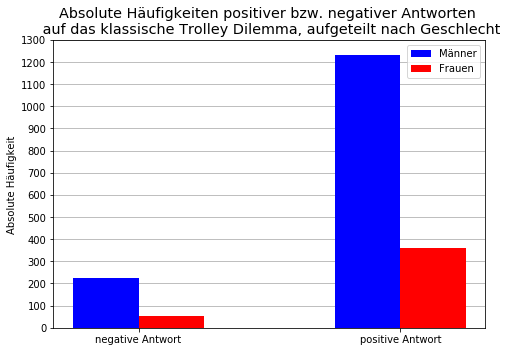

In [133]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
X = np.arange(2)
data= [[226, 1232], [53, 359]]
ax.bar(X + 0.00, data[0], color='b', width=0.25)
ax.bar(X + 0.25, data[1], color='r', width=0.25)
ax.set_ylabel('Absolute Häufigkeit')
plt.xticks([0.125,1.125], ['negative Antwort', 'positive Antwort'])
ax.set_yticks([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300])
ax.yaxis.grid()
ax.set_axisbelow(True)
ax.legend(['Männer', 'Frauen'])
ax.set_title('Absolute Häufigkeiten positiver bzw. negativer Antworten \n auf das klassische Trolley Dilemma, aufgeteilt nach Geschlecht', fontsize='x-large')

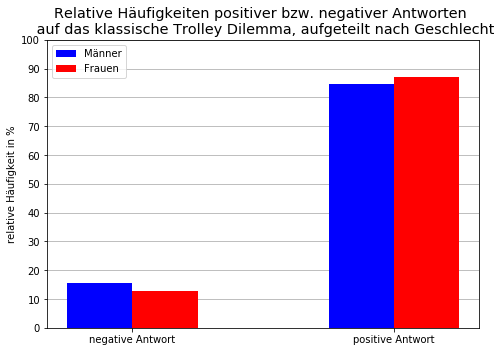

In [134]:
fig2=plt.figure()
ax2=fig2.add_axes([0,0,1,1])
X2 = np.arange(2)
data2= [[226/(226+1232)*100, 1232/(226+1232)*100], [53/(53+359)*100, 359/(53+359)*100]]
ax2.bar(X2 + 0.00, data2[0], color='b', width=0.25)
ax2.bar(X2 + 0.25, data2[1], color='r', width=0.25)
ax2.set_ylabel('relative Häufigkeit in %')
plt.xticks([0.125,1.125], ['negative Antwort', 'positive Antwort'])
ax2.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
ax2.yaxis.grid()
ax2.set_axisbelow(True)
ax2.legend(['Männer', 'Frauen'])
ax2.set_title('Relative Häufigkeiten positiver bzw. negativer Antworten \n auf das klassische Trolley Dilemma, aufgeteilt nach Geschlecht', fontsize='x-large')